Other references in numpy
- https://www.scipy.org/
- https://www.statsmodels.org/stable/index.html
- https://scikit-learn.org/stable/index.html

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns

np.__version__, pd.__version__, sns.__version__

('1.19.5', '1.2.4', '0.11.1')

In [3]:
s = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s

a    1
b    2
c    3
dtype: int64

In [4]:
s.loc['a']

1

In [6]:
s.loc['a'] = 32
s

a    32
b     2
c     3
dtype: int64

In [8]:
s.loc['x'] = 45
s

a    32
b     2
c     3
x    45
dtype: int64

In [9]:
s.keys() # alias to s.index, but func. call

Index(['a', 'b', 'c', 'x'], dtype='object')

In [10]:
s.index # get the index, not a func. call

Index(['a', 'b', 'c', 'x'], dtype='object')

In [11]:
s.items() # get the items, zip object

In [12]:
list(s.items())

[('a', 32), ('b', 2), ('c', 3), ('x', 45)]

In [13]:
s.array # get the values, not func call!

<PandasArray>
[32, 2, 3, 45]
Length: 4, dtype: int64

In [0]:
zip?

In [14]:
'a' in s

True

In [15]:
'f' in s

False

In [16]:
s = s.drop('x')
s

a    32
b     2
c     3
dtype: int64

In [20]:
#s = s.sort_index()
s

<bound method Series.sort_index of a    32
b     2
c     3
dtype: int64>

In [32]:
import pickle # https://docs.python.org/3/library/pickle.html?highlight=pickle#module-pickle
import io # https://pythontic.com/modules/pickle/dump
pickleBuffer = io.BytesIO() # OBSOLETE
pickle.dump(s,pickleBuffer)
print("Pickled buffer beginning address:")
print(pickleBuffer.getbuffer())
print('-----')
print("Unpickling of the object from memory started")
s_unpickled = pickle.loads(pickleBuffer.getbuffer())
print("Unpickling of the object from memory ended")
print("Printing the attributes of unpickled object")
s_unpickled

Pickled buffer beginning address:
-----
Unpickling of the object from memory started
Unpickling of the object from memory ended
Printing the attributes of unpickled object


<bound method Series.sort_index of a    32
b     2
c     3
dtype: int64>

In [25]:
with open('test.pickle', 'bw') as f:
    pickle.dump(s, f)

In [26]:
!cat test.pickle

���      �builtins��getattr����pandas.core.series��Series���)��}�(�_mgr��pandas.core.internals.managers��SingleBlockManager���)��(]��pandas.core.indexes.base��
�blocks�]�}�(�values�h2�mgr_locs��builtins��slice���K KK��R�uaust�b�_typ��series��	_metadata�]�h,a�attrs�}��_flags�}��allows_duplicate_labels��sh,Nub�
sort_index���R�.

In [28]:
with open('test.pickle', 'br') as f:
    b = pickle.load(f)
b

<bound method Series.sort_index of a    32
b     2
c     3
dtype: int64>

In [33]:
s = pd.Series([1, 2, 3, 10], index=['a', 'b', 'c', 'a'])
s

a     1
b     2
c     3
a    10
dtype: int64

In [34]:
s.loc['a'] # we get all values for this index

a     1
a    10
dtype: int64

In [36]:
s.loc['a'] = 100 # change all values at once
s

a    100
b      2
c      3
a    100
dtype: int64

In [37]:
s.iloc[0] = -23
s

a    -23
b      2
c      3
a    100
dtype: int64

In [39]:
# error: https://pandas.pydata.org/docs/user_guide/duplicates.html#disallowing-duplicate-labels
s = pd.Series([1, 2, 3, 10], index=['a', 'b', 'c', 'a']) .set_flags(allows_duplicate_labels=False)

DuplicateLabelError: Index has duplicates.
      positions
label          
a        [0, 3]

In [41]:
# DO NOT DO THAT !
s.loc['str'] = '4' # we add a string
s # dtype "object" instead of "int64"

a      -23
b        2
c        3
a      100
str      4
dtype: object

In [42]:
a = np.random.randint(-10,10,100)
a

array([ -9,   7,   2,   3,   0,  -4,   5,   6,   0,  -2,   2,  -8,   5,
         9,  -9,   8,  -5,   1,  -2,  -1,  -9,   8,   7,  -8,  -9,   5,
        -5,  -6,  -3,   0,  -9,  -9,   7,  -6,  -6,  -8,   6,   2,   3,
         3,  -8,   2,   2,   4,  -2,   0,  -7,   8,   7,  -5,   6,   3,
        -7,  -6,  -3,  -1,   2,  -6,   8,   7,   5,   8,  -9,  -9,  -7,
         9,   1,   2,   7,   4,   2,  -9,   3,  -9, -10,  -8, -10, -10,
        -9,   5,   9,  -3, -10,   0,   5,  -1,   2,  -3,  -9,   1,  -8,
        -2,   9,  -4,  -9,   3,   2, -10,   8,   8])

In [45]:
a[a>0].mean()

4.914893617021277

In [48]:
a[a<0].mean()

-6.5

In [47]:
a[a==0].mean()

0.0

In [49]:
s + s

a      -46
b        4
c        6
a      200
str     44
dtype: object

In [51]:
type(s['a']), type(s['b']), type(s['str'])

(pandas.core.series.Series, int, str)

In [53]:
s = pd.Series([1, 2, 3.0], index=list('abc'))
s

a    1.0
b    2.0
c    3.0
dtype: float64

In [55]:
s.astype(np.int8) # returns a new Series

a    1
b    2
c    3
dtype: int8

In [56]:
s = pd.Series(range(1000000))
s

0              0
1              1
2              2
3              3
4              4
           ...  
999995    999995
999996    999996
999997    999997
999998    999998
999999    999999
Length: 1000000, dtype: int64

In [57]:
s.dtype

dtype('int64')

In [58]:
type(s.loc[0])

numpy.int64

In [59]:
# compute square on np.int64 obj
%timeit np.square(s)

1.11 ms ± 34.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [61]:
s.loc[1000001] = 'a'
s

0               0
1               1
2               2
3               3
4               4
            ...  
999996     999996
999997     999997
999998     999998
999999     999999
1000001         a
Length: 1000001, dtype: object

In [62]:
s = s.drop(1000001)
s

0              0
1              1
2              2
3              3
4              4
           ...  
999995    999995
999996    999996
999997    999997
999998    999998
999999    999999
Length: 1000000, dtype: object

In [63]:
s.dtype, type(s.loc[0])

(dtype('O'), int)

In [64]:
# compute square on int object
%timeit np.square(s)

57.9 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [65]:
s = pd.Series([30, 35, 20], index=['alice', 'bob', 'julie'])
s

alice    30
bob      35
julie    20
dtype: int64

In [66]:
s.loc[s>25]

alice    30
bob      35
dtype: int64

In [67]:
s.loc[['alice', 'julie']]

alice    30
julie    20
dtype: int64

In [69]:
s.loc[s<=25] = np.nan
s

alice    30.0
bob      35.0
julie     NaN
dtype: float64

In [70]:
s.loc[['alice', 'julie']] = [42, 45]
s

alice    42.0
bob      35.0
julie    45.0
dtype: float64

In [73]:
s.loc[s>20] = 1 # scalars are broadcasted
s

alice    1.0
bob      1.0
julie    1.0
dtype: float64

In [74]:
s = pd.Series([30, 35, 20], index=['alice', 'bob', 'julie'])
s>25

alice     True
bob       True
julie    False
dtype: bool

In [75]:
s.loc[s<25]

julie    20
dtype: int64

In [76]:
s.iloc[s<25] # error

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [121]:
s = pd.Series(['alice', 'bob', 'eve', 'bob', 'bill', 'alice'], index=list('abcdef'))
s

a    alice
b      bob
c      eve
d      bob
e     bill
f    alice
dtype: object

In [122]:
'eve' in s # search on the index

False

In [123]:
'a' in s

True

In [124]:
'eve' == s # return a Series of booleans

a    False
b    False
c     True
d    False
e    False
f    False
dtype: bool

In [125]:
s['eve' == s].keys()

Index(['c'], dtype='object')

In [126]:
s['eve' == s].index

Index(['c'], dtype='object')

In [127]:
s['eve' == s].values

array(['eve'], dtype=object)

In [128]:
s.isin(['eve', 'bob', 'jon'])

a    False
b     True
c     True
d     True
e    False
f    False
dtype: bool

In [97]:
('eve' == s).any() # to get a single boolean

True

In [98]:
('eve' == s).all()

False

In [99]:
s = pd.Series([30, 35, 20], index=['alice', 'bob', 'julie'])
s

alice    30
bob      35
julie    20
dtype: int64

In [100]:
s.iloc[0:2] # exclusive on 2

alice    30
bob      35
dtype: int64

In [101]:
s.loc['alice':'julie'] # inclusive on 'julie'

alice    30
bob      35
julie    20
dtype: int64

In [102]:
s = pd.Series([30, 35, 20, 12], index=['a', 'b', 'c', 'd'])
s

a    30
b    35
c    20
d    12
dtype: int64

In [103]:
s.loc['a': 'c']

a    30
b    35
c    20
dtype: int64

In [104]:
s = pd.Series([30, 35, 20, 12], index=['a', 'd', 'b', 'c'])
s

a    30
d    35
b    20
c    12
dtype: int64

In [105]:
s.loc['a': 'c']

a    30
d    35
b    20
c    12
dtype: int64

In [106]:
s = pd.Series([30, 35, 20, 12], index=['a', 'a', 'b', 'c'])
s

a    30
a    35
b    20
c    12
dtype: int64

In [107]:
s.loc['a':'b']

a    30
a    35
b    20
dtype: int64

In [108]:
s = pd.Series([30, 35, 20, 12], index=['a', 'b', 'c', 'a'])
s

a    30
b    35
c    20
a    12
dtype: int64

In [109]:
s.loc['a':'b'] # error

KeyError: "Cannot get left slice bound for non-unique label: 'a'"

In [136]:
s = pd.Series(['a', 'b', 'c'], index=[2, 0, 1])
s

2    a
0    b
1    c
dtype: object

In [137]:
s[0], s[1], s[2]

('b', 'c', 'a')

In [138]:
s[3:0]

Series([], dtype: object)

In [139]:
s[0:3]

2    a
0    b
1    c
dtype: object

In [140]:
s.keys()

Int64Index([2, 0, 1], dtype='int64')

In [141]:
s.index

Int64Index([2, 0, 1], dtype='int64')

In [142]:
s.index()

TypeError: 'Int64Index' object is not callable

In [143]:
s.values

array(['a', 'b', 'c'], dtype=object)

In [144]:
s.values()

TypeError: 'numpy.ndarray' object is not callable

In [145]:
s.array

<PandasArray>
['a', 'b', 'c']
Length: 3, dtype: object

In [146]:
s.array[2]

'c'

In [147]:
s.values[2]

'c'

In [149]:
s.index[2]

1

In [155]:
t = s.items()
t

In [157]:
for k, v in t:
    print(f"The key is {k} and the value is {v}")

The key is 2 and the value is a
The key is 0 and the value is b
The key is 1 and the value is c


### Recap Pandas attributes
- `s.array` instead `s.values`
- is `item` in `s.array`?
- `for k, v in s.items: ...`
- is `item` in `s.keys`?

In [159]:
s = pd.Series(['a', 'b', 'c'], index=[2, 0, 1])
s

2    a
0    b
1    c
dtype: object

In [165]:
s.loc[2], s.iloc[2]

('a', 'c')

In [171]:
s.loc[2:1] # inclusive WARNING

2    a
0    b
1    c
dtype: object

In [172]:
s.iloc[0:3] # exclusive

2    a
0    b
1    c
dtype: object

In [173]:
a = pd.Index(['alice', 'bob', 'marc'])

In [174]:
a[0], a[-1], a[0:2], a[1:]

('alice',
 'marc',
 Index(['alice', 'bob'], dtype='object'),
 Index(['bob', 'marc'], dtype='object'))

In [176]:
a[a<='c']

Index(['alice', 'bob'], dtype='object')

In [177]:
'bob' in a

True

In [178]:
a = pd.Index(['alice', 'bob', 'marc'])
a

Index(['alice', 'bob', 'marc'], dtype='object')

In [179]:
b = pd.Index(['joe', 'eric', 'bob'])
b

Index(['joe', 'eric', 'bob'], dtype='object')

In [180]:
a.intersection(b)

Index(['bob'], dtype='object')

In [181]:
a.union(b)

Index(['alice', 'bob', 'eric', 'joe', 'marc'], dtype='object')

In [182]:
a.difference(b)

Index(['alice', 'marc'], dtype='object')

In [183]:
a.symmetric_difference(b)

Index(['alice', 'eric', 'joe', 'marc'], dtype='object')

In [184]:
import pandas as pd
import numpy as np
import random
import time
# test the element lookup with a sorted
# index with unique elements
s = pd.Series(range(100_000))
print(f"Is the index monotonic: {s.index.is_monotonic_increasing}\n"
f"Is the index unique: {s.index.is_unique}")
print(f"Is s.loc[55_000] give the same values as s.loc[[55_000]]: "
f"{(s.loc[55_000]==s.loc[[55_000]]).all()}")
%timeit s.loc[55_000]
%timeit s.loc[[55_000]] # same result as above, but takes a differente
# code path that is 10x slower
%timeit s.loc[55_000:56_000]

Is the index monotonic: True
Is the index unique: True
Is s.loc[55_000] give the same values as s.loc[[55_000]]: True


7.58 µs ± 258 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


248 µs ± 42.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


27.5 µs ± 3.17 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [189]:
# let's make the same operation with a sorted index
# with duplicate elements. It is a bit slower
s = pd.Series(range(100000), index=list(range(99_999)) + [1]).sort_index()
t = pd.Series(range(100000), index=list(range(99_999)) + [1])
print(s[-5:], s[:5])
print(t[-5:], t[:5])
print(f"Is the index monotonic: {s.index.is_monotonic_increasing}\n"
        f"Is the index unique: {s.index.is_unique}")
print(f"Is the index monotonic: {t.index.is_monotonic_increasing}\n"
        f"Is the index unique: {t.index.is_unique}")
%timeit s.loc[55_000]
%timeit s.loc[[55_000]] # take a code path that is 12x slower
%timeit s.loc[55_000:56_000]
%timeit t.loc[55_000]
%timeit t.loc[[55_000]] # take a code path that is 12x slower
%timeit t.loc[55_000:56_000]

99994    99994
99995    99995
99996    99996
99997    99997
99998    99998
dtype: int64 0        0
1    99999
1        1
2        2
3        3
dtype: int64
99995    99995
99996    99996
99997    99997
99998    99998
1        99999
dtype: int64 0    0
1    1
2    2
3    3
4    4
dtype: int64
Is the index monotonic: True
Is the index unique: False
Is the index monotonic: False
Is the index unique: False


11.2 µs ± 807 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


213 µs ± 21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


36.7 µs ± 2.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


85.9 µs ± 2.75 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


10 ms ± 451 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


209 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [190]:
# now let's make it on an unsorted index with unique values
# still very fast, faster than a sorted index with duplicate values
L = list(range(100_000))
random.shuffle(L)
s = pd.Series(range(100000), index=L)
print(f"Is the index monotonic: {s.index.is_monotonic_increasing}\n"
        f"Is the index unique: {s.index.is_unique}")
%timeit s.loc[55_000]
%timeit s.loc[[55_000]] # takes a code path that is 20x slower
%timeit s.loc[55_000:56_000]

Is the index monotonic: False
Is the index unique: True


8.13 µs ± 325 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


299 µs ± 96.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


31.9 µs ± 645 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Index performance
- https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#fast-scalar-value-getting-and-setting

In [191]:
d = dict(zip(range(100_000), range(100_000)))
s = pd.Series(range(100_000))
%timeit d[55_000]
%timeit s.loc[55_000]
%timeit s[55_000] # fast, but ambiguous, shouldn't be used
%timeit s.at[55_000]

57.4 ns ± 0.591 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


7.65 µs ± 826 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


2.47 µs ± 253 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


3.81 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# DataFrames

In [192]:
age = pd.Series([30, 20, 50], index=['alice', 'bob', 'julie'])
height = pd.Series([150, 170, 168], index=['alice', 'marc', 'julie'])
age, height

(alice    30
 bob      20
 julie    50
 dtype: int64, alice    150
 marc     170
 julie    168
 dtype: int64)

In [193]:
stat = pd.DataFrame({'age': age, 'height':height, 'city':'Paris'})
stat

,age,height,city
alice,30.0,150.0,Paris
bob,20.0,NaN,Paris
julie,50.0,168.0,Paris
marc,NaN,170.0,Paris


In [194]:
stat.index

Index(['alice', 'bob', 'julie', 'marc'], dtype='object')

In [195]:
stat.columns

Index(['age', 'height', 'city'], dtype='object')

In [196]:
stat.loc[:,'age']

alice    30.0
bob      20.0
julie    50.0
marc      NaN
Name: age, dtype: float64

In [198]:
a = np.random.randint(1, 20, 9).reshape(3,3)
a

array([[9, 8, 1],
       [8, 3, 5],
       [3, 1, 2]])

In [199]:
p = pd.DataFrame(a, index=['a', 'b', 'c'], columns=['x', 'y', 'z'])
p

,x,y,z
a,9,8,1
b,8,3,5
c,3,1,2


In [200]:
s = pd.Series([10, 20, 30], index=['alice', ' bob', 'eve'])
print(type(s), s, sep='\n')

<class 'pandas.core.series.Series'>
alice    10
 bob     20
eve      30
dtype: int64


In [201]:
df = s.to_frame()
print(type(df), df, sep='\n')

<class 'pandas.core.frame.DataFrame'>
        0
alice  10
 bob   20
eve    30


In [202]:
names = ['alice', 'bob', 'marc', 'bill', 'julie']
age = pd.Series([12, 13, 16, 11, 16], index=names)
height = pd.Series([130, 140, 176, 120, 165], index=names)
sex = pd.Series(list('fmmmf'), index=names)
p = pd.DataFrame({'age':age, 'height':height, 'sex':sex})
p

,age,height,sex
alice,12,130,f
bob,13,140,m
marc,16,176,m
bill,11,120,m
julie,16,165,f


In [203]:
p.head(2) # the default is 5

,age,height,sex
alice,12,130,f
bob,13,140,m


In [204]:
p.index

Index(['alice', 'bob', 'marc', 'bill', 'julie'], dtype='object')

In [205]:
p.columns

Index(['age', 'height', 'sex'], dtype='object')

In [206]:
p.T # we can transpose a DataFrame easily

,alice,bob,marc,bill,julie
age,12,13,16,11,16
height,130,140,176,120,165
sex,f,m,m,m,f


In [207]:
p.to_numpy() # p.values should no more be used

array([[12, 130, 'f'],
       [13, 140, 'm'],
       [16, 176, 'm'],
       [11, 120, 'm'],
       [16, 165, 'f']], dtype=object)

In [208]:
# you must install first the module tabulate
!pip install tabulate #from a notebook or ipython

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [209]:
m = p.to_markdown()
print(m)

|       |   age |   height | sex   |
|:------|------:|---------:|:------|
| alice |    12 |      130 | f     |
| bob   |    13 |      140 | m     |
| marc  |    16 |      176 | m     |
| bill  |    11 |      120 | m     |
| julie |    16 |      165 | f     |


In [210]:
print(p.to_latex())

\begin{tabular}{lrrl}
\toprule
{} &  age &  height & sex \\
\midrule
alice &   12 &     130 &   f \\
bob   &   13 &     140 &   m \\
marc  &   16 &     176 &   m \\
bill  &   11 &     120 &   m \\
julie &   16 &     165 &   f \\
\bottomrule
\end{tabular}



In [211]:
p.describe() # get general statistics on the numerical columns

,age,height
count,5.000000,5.000000
mean,13.600000,146.200000
std,2.302173,23.605084
min,11.000000,120.000000
25%,12.000000,130.000000
50%,13.000000,140.000000
75%,16.000000,165.000000
max,16.000000,176.000000


In [212]:
p.memory_usage(deep=True)

Index     478
age        40
height     40
sex       290
dtype: int64

In [213]:
p.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, alice to julie
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     5 non-null      int64 
 1   height  5 non-null      int64 
 2   sex     5 non-null      object
dtypes: int64(2), object(1)
memory usage: 848.0 bytes


### Blockmanager
- https://uwekorn.com/2020/05/24/the-one-pandas-internal.html

In [214]:
p._data

BlockManager
Items: Index(['age', 'height', 'sex'], dtype='object')
Axis 1: Index(['alice', 'bob', 'marc', 'bill', 'julie'], dtype='object')
IntBlock: slice(0, 2, 1), 2 x 5, dtype: int64
ObjectBlock: slice(2, 3, 1), 1 x 5, dtype: object

In [215]:
p

,age,height,sex
alice,12,130,f
bob,13,140,m
marc,16,176,m
bill,11,120,m
julie,16,165,f


## Import/export
- https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html
- https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [217]:
p.to_csv(r"my_file.csv")

In [218]:
new_df = pd.read_csv(r"my_file.csv", index_col=0)
new_df

,age,height,sex
alice,12,130,f
bob,13,140,m
marc,16,176,m
bill,11,120,m
julie,16,165,f


## Accessing elements
- https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [220]:
#let’s take again the same dataframe as in the previous example
names = ['alice', 'bob', 'marc', 'bill', 'julie']
age = pd.Series([12, 13, 16, 11, 16], index=names)
height = pd.Series([130, 140, 176, 120, 165],
index=names)
sex = pd.Series(list('fmmmf'), index=names)
p = pd.DataFrame({'age':age, 'height':height, 'sex':sex})
p

,age,height,sex
alice,12,130,f
bob,13,140,m
marc,16,176,m
bill,11,120,m
julie,16,165,f


In [221]:
p.loc['alice']

age        12
height    130
sex         f
Name: alice, dtype: object

In [222]:
p.loc['alice', 'sex']

'f'

In [223]:
p.loc[:, 'age']

alice    12
bob      13
marc     16
bill     11
julie    16
Name: age, dtype: int64

In [224]:
p.loc['alice':'bill','age']

alice    12
bob      13
marc     16
bill     11
Name: age, dtype: int64

In [225]:
p.loc[['alice', 'marc', 'bill']]

,age,height,sex
alice,12,130,f
marc,16,176,m
bill,11,120,m


In [226]:
p.loc[p.loc[:, 'sex']=='f']

,age,height,sex
alice,12,130,f
julie,16,165,f


In [227]:
# keep only males older than 12
p.loc[(p.loc[:,'sex'] =='m') & (p.loc[:,'age'] > 12)]

,age,height,sex
bob,13,140,m
marc,16,176,m


In [228]:
p.loc[:,['sex', 'height', 'age']]

,sex,height,age
alice,f,130,12
bob,m,140,13
marc,m,176,16
bill,m,120,11
julie,f,165,16


In [229]:
p

,age,height,sex
alice,12,130,f
bob,13,140,m
marc,16,176,m
bill,11,120,m
julie,16,165,f


In [230]:
p.iloc[0]

age        12
height    130
sex         f
Name: alice, dtype: object

In [231]:
p.iloc[0,2]

'f'

In [232]:
p.iloc[0:2,0:2]

,age,height
alice,12,130
bob,13,140


In [233]:
p['age'] # single label: access columns

alice    12
bob      13
marc     16
bill     11
julie    16
Name: age, dtype: int64

In [234]:
p['alice':'marc'] # slice: access rows (inclusive)

,age,height,sex
alice,12,130,f
bob,13,140,m
marc,16,176,m


In [235]:
p[0:2] # slice: access rows (exclusive)

,age,height,sex
alice,12,130,f
bob,13,140,m


In [236]:
p.age

alice    12
bob      13
marc     16
bill     11
julie    16
Name: age, dtype: int64

In [249]:
p.age, p['age'], p.loc[:,'age'], p.iloc[:, 0], p[['age']]

(alice    12
 bob      13
 marc     16
 bill     11
 julie    16
 Name: age, dtype: int64, alice    12
 bob      13
 marc     16
 bill     11
 julie    16
 Name: age, dtype: int64, alice    12
 bob      13
 marc     16
 bill     11
 julie    16
 Name: age, dtype: int64, alice    12
 bob      13
 marc     16
 bill     11
 julie    16
 Name: age, dtype: int64,        age
 alice   12
 bob     13
 marc    16
 bill    11
 julie   16)

In [250]:
# p.age, p['age'], p.loc[:,'age'], p.iloc[:, 2]
%timeit p.age
%timeit p['age']
%timeit p.loc[:,'age']
%timeit p.iloc[:, 0]
%timeit p[['age']]

3.23 µs ± 201 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


1.19 µs ± 16.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


12.8 µs ± 540 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


34.4 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


389 µs ± 36.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [246]:
p.autre = 1 # does not work, it creates a new attribute in p, not a colmun
p

,age,height,sex
alice,12,130,f
bob,13,140,m
marc,16,176,m
bill,11,120,m
julie,16,165,f


In [247]:
p['autre'] = 1
p

,age,height,sex,autre
alice,12,130,f,1
bob,13,140,m,1
marc,16,176,m,1
bill,11,120,m,1
julie,16,165,f,1


In [248]:
p[['age', 'sex']]

,age,sex
alice,12,f
bob,13,m
marc,16,m
bill,11,m
julie,16,f


In [251]:
p[p.loc[:,'sex']=='f']

,age,height,sex,autre
alice,12,130,f,1
julie,16,165,f,1


In [252]:
p[(p.loc[:,'age']>13) & (p.loc[:,'sex']=='m')]

,age,height,sex,autre
marc,16,176,m,1


In [253]:
'alice' in p # search in the columns

False

In [254]:
'alice' in p.index # force the search in the index

True

In [255]:
'age' in p

True

In [256]:
12 == p # search in the values

,age,height,sex,autre
alice,True,False,False,False
bob,False,False,False,False
marc,False,False,False,False
bill,False,False,False,False
julie,False,False,False,False


In [257]:
p.isin([12, 130])

,age,height,sex,autre
alice,True,True,False,False
bob,False,False,False,False
marc,False,False,False,False
bill,False,False,False,False
julie,False,False,False,False


In [259]:
p.isin({'age': [12, 13, 14], 'sex':['m']})

,age,height,sex,autre
alice,True,False,False,False
bob,True,False,True,False
marc,False,False,True,False
bill,False,False,True,False
julie,False,False,False,False


In [262]:
p[p.isin({'age': [12, 13, 14], 'sex':['m']})]

,age,height,sex,autre
alice,12.0,NaN,NaN,NaN
bob,13.0,NaN,m,NaN
marc,NaN,NaN,m,NaN
bill,NaN,NaN,m,NaN
julie,NaN,NaN,NaN,NaN


In [263]:
p.isin([12, 130]).any()

age        True
height     True
sex       False
autre     False
dtype: bool

In [266]:
p.isin([12, 130]).any(axis=None) # we can specify the axis, None means aggregate all booleans

True

In [267]:
names = ['alice', 'bob', 'marc']
age = pd.Series([12, 13, 16], index=names)
height = pd.Series([130, 140, 176], index=names)
sex = pd.Series(list('fmm'), index=names)
p = pd.DataFrame({'age':age, 'height':height, 'sex':sex})
p

,age,height,sex
alice,12,130,f
bob,13,140,m
marc,16,176,m


In [268]:
p.reset_index() # returns a new DataFrame

,index,age,height,sex
0,alice,12,130,f
1,bob,13,140,m
2,marc,16,176,m


In [269]:
p

,age,height,sex
alice,12,130,f
bob,13,140,m
marc,16,176,m


In [270]:
p.reset_index().set_index('age') # returns a new DataFrame

,index,height,sex
age,,,
12,alice,130,f
13,bob,140,m
16,marc,176,m


In [271]:
p.index = pd.Index(['eve', 'jo', 'bill'])
print(p)
p

      age  height sex
eve    12     130   f
jo     13     140   m
bill   16     176   m


,age,height,sex
eve,12,130,f
jo,13,140,m
bill,16,176,m


In [272]:
names = ['alice', 'bob', 'marc']
age = pd.Series([12, 13, 16], index=names)
height = pd.Series([130, 140, 176], index=names)
sex = pd.Series(list('fmm'), index=names)
p = pd.DataFrame({'age':age, 'height':height, 'sex':sex})
p

,age,height,sex
alice,12,130,f
bob,13,140,m
marc,16,176,m


In [273]:
p.reindex(index=['marc', 'alice', 'bill'], columns=['sex', 'age'])

,sex,age
marc,m,16.0
alice,f,12.0
bill,NaN,NaN


## Iteration
- iterrows()
- itertuples()

## Plotting
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

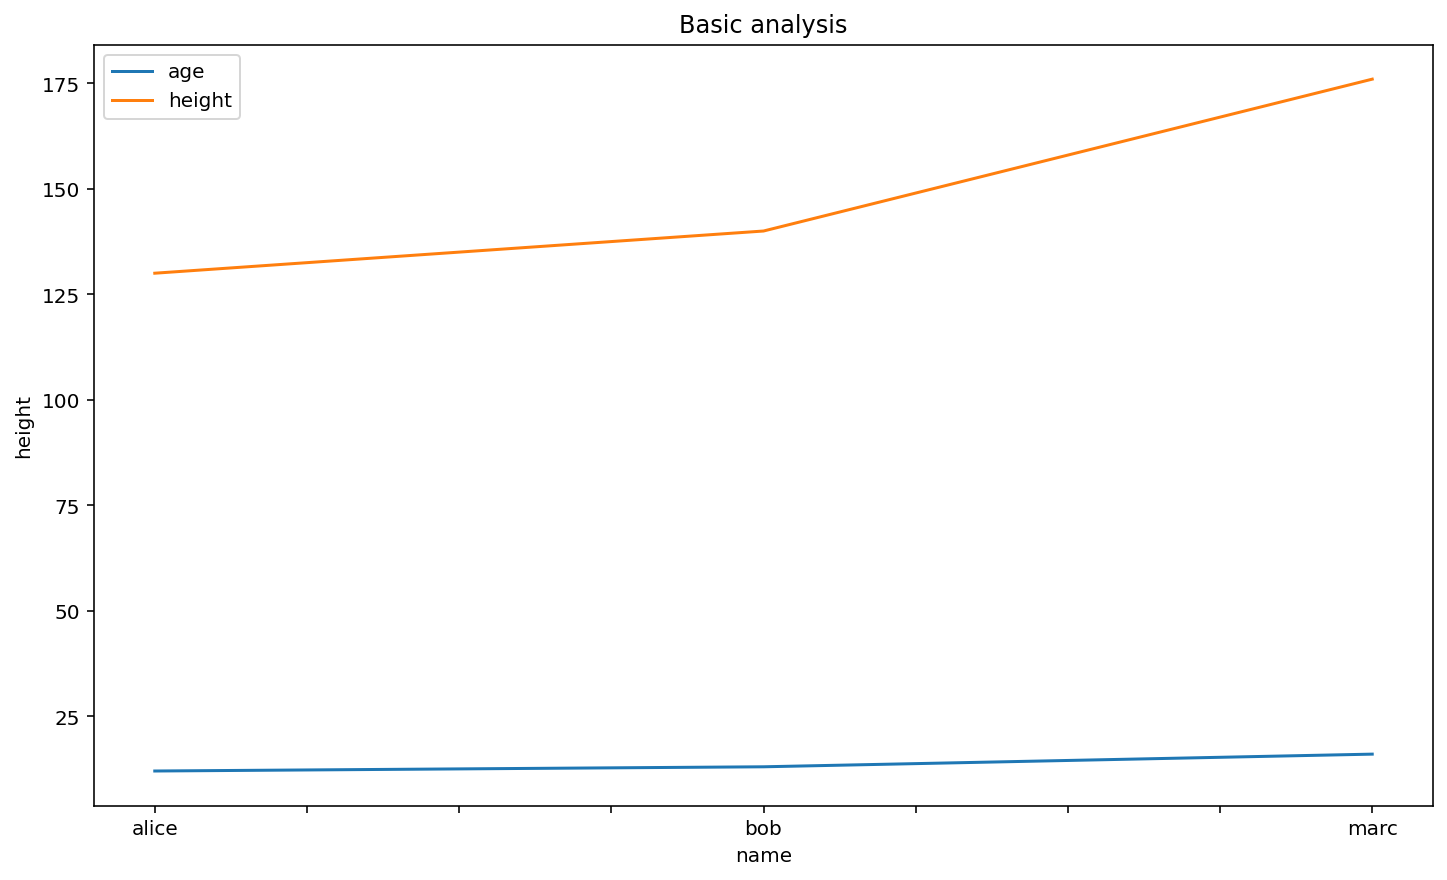

In [275]:
import matplotlib.pyplot as plt
# plot only the two numeric columns
p.loc[:,['age', 'height']].plot(xlabel='name', ylabel='height')
plt.title('Basic analysis')
plt.savefig('basic.png')
plt.show() # if in an interpreter, not needed in a notebook

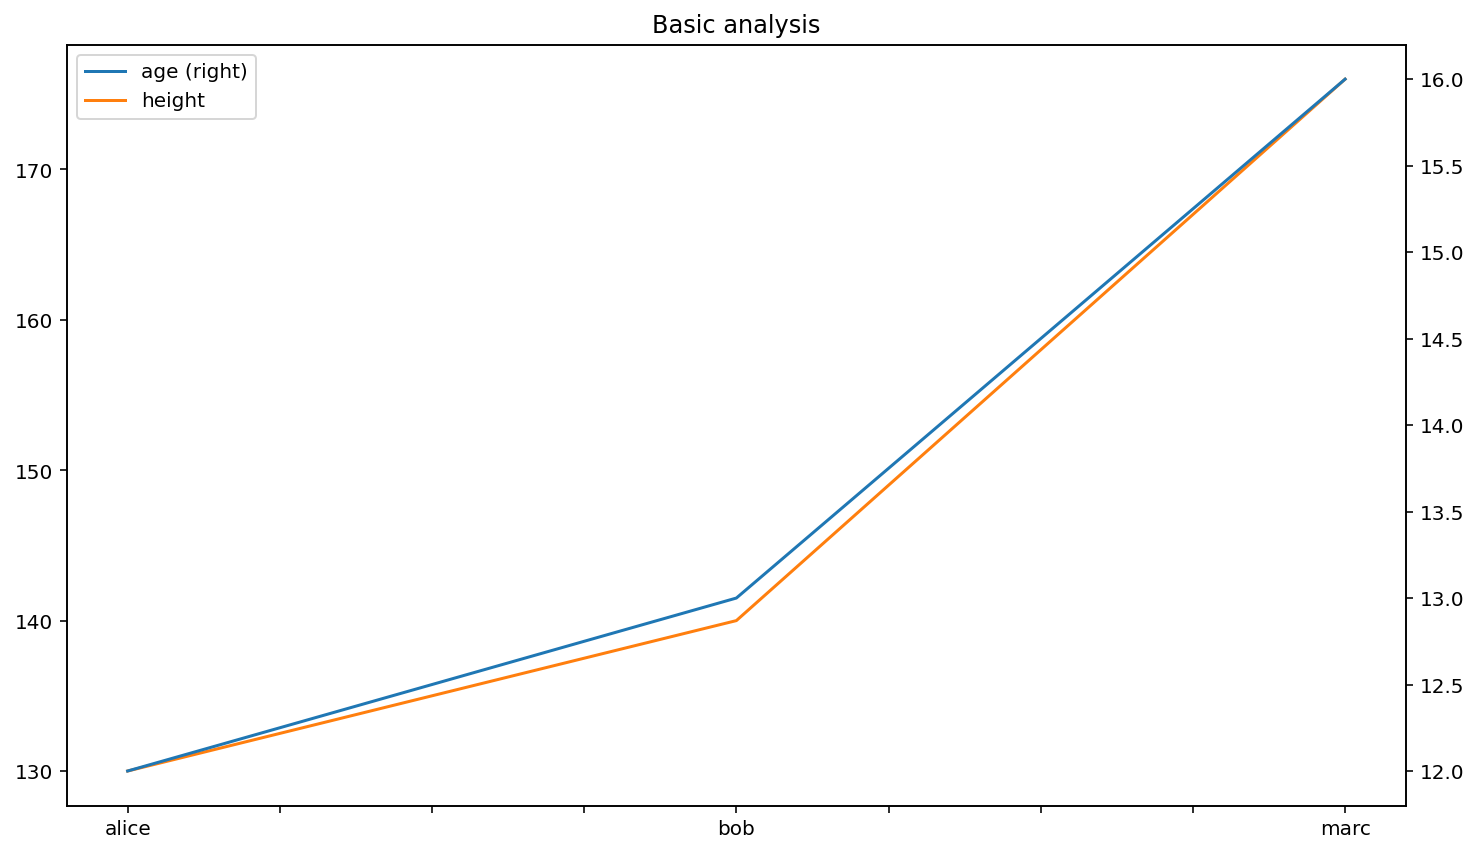

In [276]:
import matplotlib.pyplot as plt
# use a secondary y-axis for age
p.loc[:,['age', 'height']].plot(secondary_y=['age'])
plt.title('Basic analysis')
plt.savefig('basic.png')
plt.show()